In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=120

### Loading the dataset

In [2]:
df=pd.read_csv("Zoo.csv")

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### EDA 

In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.shape

(101, 18)

In [6]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [9]:
# so there is one animal whose occuring twice

In [10]:
df[df['animal name']=='frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
# so the one frog is non venomous while other is venomous so change the name of the 26th animal name

In [12]:
df['animal name'][(df['venomous'] == 1 )& (df['animal name'] == 'frog')] = "frog_ven"

In [13]:
df['animal name'].value_counts()

aardvark    1
polecat     1
seal        1
seahorse    1
scorpion    1
           ..
goat        1
gnat        1
girl        1
giraffe     1
wren        1
Name: animal name, Length: 101, dtype: int64

In [14]:
df[df['animal name']=='frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


In [15]:
df[df['animal name']=='frog_ven']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,frog_ven,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


<Axes: >

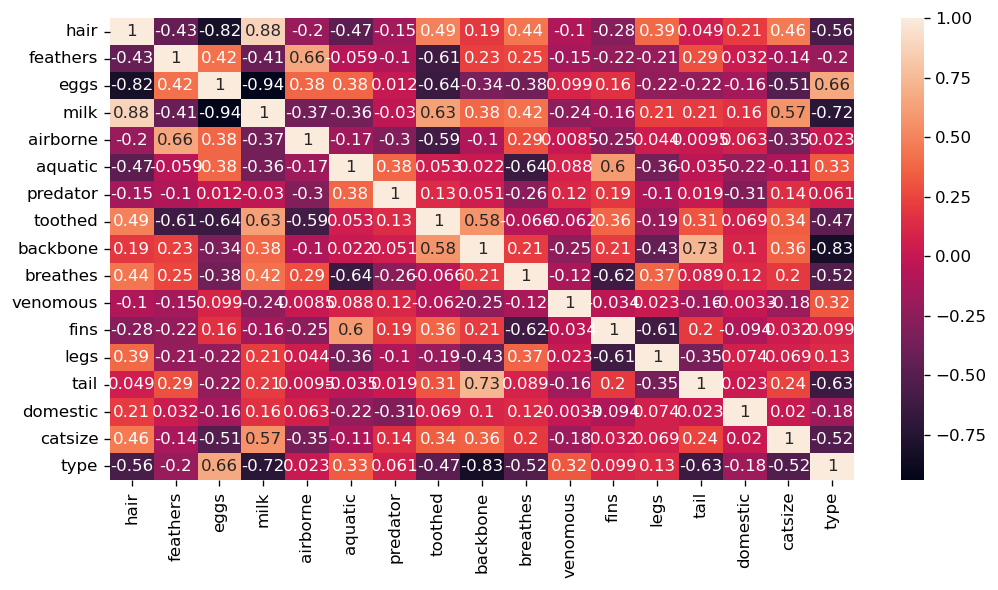

In [16]:
sns.heatmap(df.corr(),annot=True)

### Model Building

In [17]:
x=df.iloc[:,1:-1]
y=df['type']

In [18]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


### Feature Scaling

In [19]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [21]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.71      0.83         7
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           7       0.67      1.00      0.80         2

    accuracy                           0.88        26
   macro avg       0.67      0.63      0.63        26
weighted avg       0.97      0.88      0.92        26



### Training and Testing Accuracy

In [22]:
print('Training Accuracy',knn.score(xtrain,ytrain))
print('Testing Accuracy',knn.score(xtest,ytest))

Training Accuracy 0.96
Testing Accuracy 0.8846153846153846


#### So there is overfitting issue as the testing accuracy is very low compare to training accuracy we have to do a hyperparameter tuning

### HyperParameter Tuning

In [23]:
trainacc=[]
testacc=[]

for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainacc.append(knn.score(xtrain,ytrain))
    testacc.append(knn.score(xtest,ytest))

In [24]:
trainacc

[1.0,
 0.9466666666666667,
 0.9466666666666667,
 0.96,
 0.96,
 0.9333333333333333,
 0.92,
 0.9066666666666666,
 0.88,
 0.88,
 0.8933333333333333,
 0.8933333333333333,
 0.88,
 0.88,
 0.88,
 0.8933333333333333,
 0.8933333333333333,
 0.88,
 0.88,
 0.8533333333333334,
 0.8266666666666667,
 0.8,
 0.7866666666666666,
 0.7866666666666666]

In [25]:
testacc

[0.9615384615384616,
 0.8846153846153846,
 0.9230769230769231,
 0.9615384615384616,
 0.8846153846153846,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.8076923076923077,
 0.8076923076923077,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461]

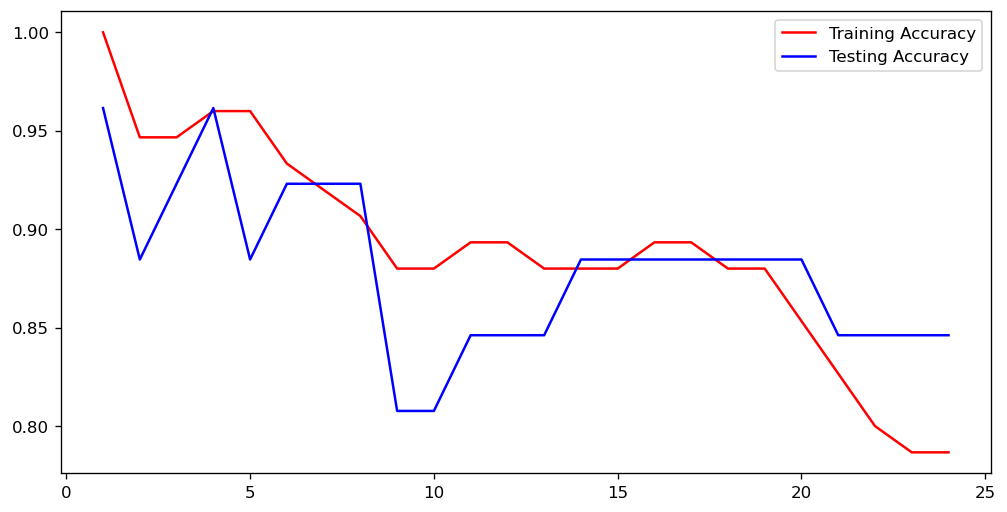

In [26]:
plt.plot(range(1,25),trainacc,color='red',label='Training Accuracy')
plt.plot(range(1,25),testacc,color='blue',label='Testing Accuracy')
plt.xlabel=('Number of K')
plt.ylabel=("Accuracy")
plt.legend()

### Final Model

In [27]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)

print('Training Accuracy',knn.score(xtrain,ytrain))
print('Testing Accuracy',knn.score(xtest,ytest))

Training Accuracy 0.96
Testing Accuracy 0.9615384615384616
